In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

### 1.a Splitting to train and test

In [259]:
df1 = pd.read_csv('class_1.csv', header=None)
df2 = pd.read_csv('class_2.csv', header=None)
df3 = pd.read_csv('class_3.csv', header=None)

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df1.columns = feature_names
df2.columns = feature_names
df3.columns = feature_names

classes = np.transpose([1, 2, 3])

df1['class'] = 1
df2['class'] = 2
df3['class'] = 3

train_df = pd.concat([df1.iloc[:30], df2.iloc[:30], df3.iloc[:30]], ignore_index=True)
test_df = pd.concat([df1.iloc[-20:], df2.iloc[-20:], df3.iloc[-20:]], ignore_index=True)

train_df
#sns.pairplot(train_df)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
85,7.2,3.2,6.0,1.8,3
86,6.2,2.8,4.8,1.8,3
87,6.1,3.0,4.9,1.8,3
88,6.4,2.8,5.6,2.1,3


### 1.b Training a linear classifier

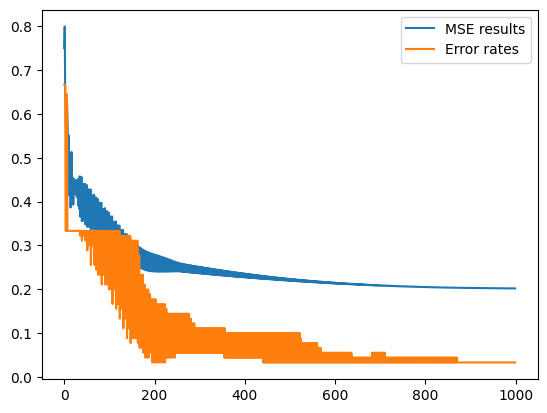

In [260]:
#Training the classifier using the train set

from logistic_regression import train_linear_classifier
from sklearn.preprocessing import OneHotEncoder

X_train = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_train = train_df['class'].values
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

W_train, mse_results, error_rates = train_linear_classifier(X_train, y_train_encoded)
epoch_list=np.arange(0, 1000, 1)
plt.figure()
plt.plot(epoch_list, mse_results, label="MSE results")
plt.plot(epoch_list, error_rates, label= "Error rates")
plt.legend()
plt.show()

#Add alpha tuning plot here

In [261]:
#Predicting using the test set
from logistic_regression import predict

X_test = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = test_df['class'].values

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
predictions = predict(X_test, W_train)


### 1.c Confusion matrix and error rate

# Task 2

### 2.a Histograms

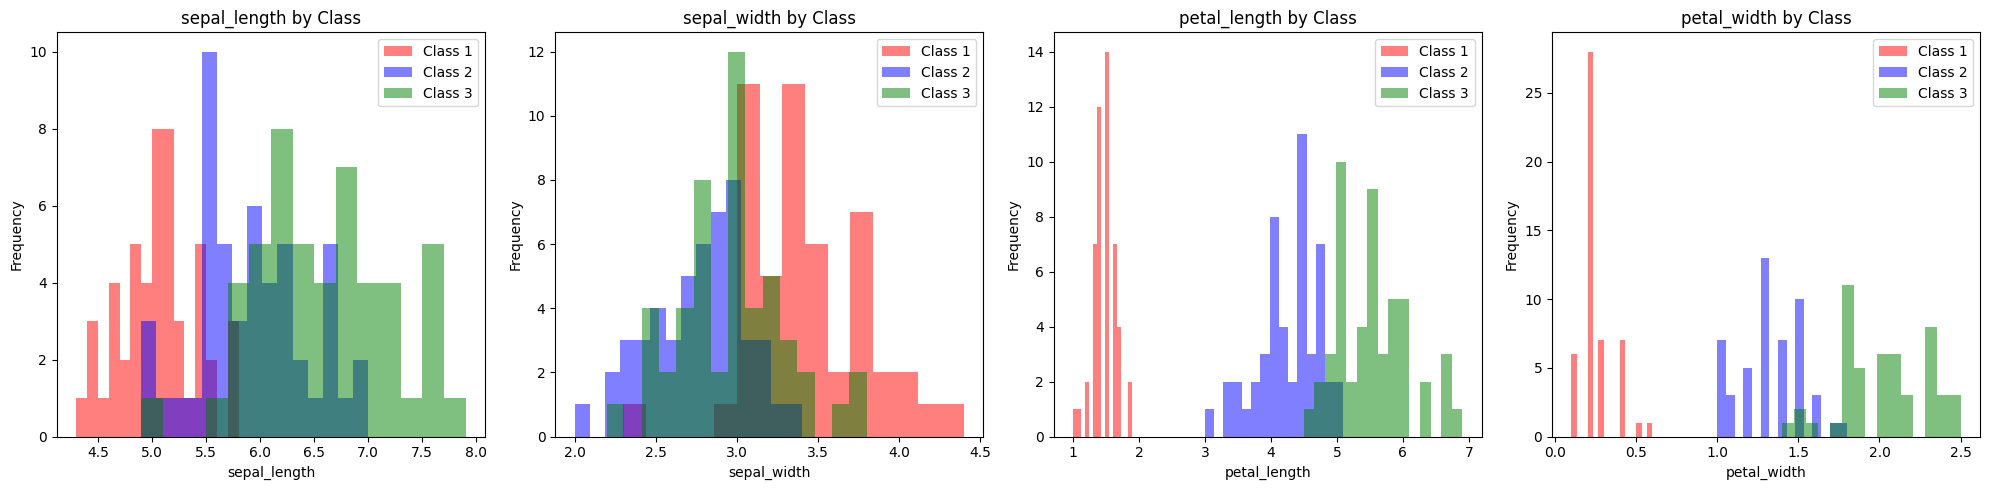

In [262]:
labels = ['Class 1', 'Class 2', 'Class 3']
colors = ['red', 'blue', 'green']
full_df = pd.concat([df1, df2, df3])

# Creating figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20,5))
dataframes = [df1, df2, df3]

for ax, feature in zip(axes, feature_names):
    for cls, col, label in zip(classes, colors, labels):
        subset = full_df[full_df['class'] == cls]
        ax.hist(subset[feature], bins=15, alpha=0.5, color=col, label=label)

    ax.set_title(f'{feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()